<a href="https://colab.research.google.com/github/LuciferHacked786/Java-Projects/blob/main/cats_and_dogs_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [19]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:07<00:00, 220MB/s]
100% 1.06G/1.06G [00:07<00:00, 143MB/s]


In [23]:
import zipfile

zip_ref = zipfile.ZipFile('dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [36]:
import tensorflow as tf
from tensorflow import keras

In [27]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [53]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Input

model = Sequential()

# Input layer
model.add(Input(shape=(256, 256, 3)))

# 1st Convolutional Block
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

# 2nd Convolutional Block
model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

# 3rd Convolutional Block
model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

# Dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [54]:
model.summary();

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [55]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [56]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 77ms/step - accuracy: 0.5867 - loss: 1.9561 - val_accuracy: 0.6468 - val_loss: 0.6802
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.6985 - loss: 0.5792 - val_accuracy: 0.7386 - val_loss: 0.5299
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.7703 - loss: 0.4836 - val_accuracy: 0.7538 - val_loss: 0.5189
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.8109 - loss: 0.4131 - val_accuracy: 0.7920 - val_loss: 0.4439
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.8491 - loss: 0.3448 - val_accuracy: 0.7976 - val_loss: 0.4750
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.8901 - loss: 0.2592 - val_accuracy: 0.7610 - val_loss: 0.6506
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 81ms/step - accuracy: 0.9225 - loss: 0.1915 - val_accuracy: 0.7990 - val_loss: 0.6359
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.9571 - loss: 0.1150 - 

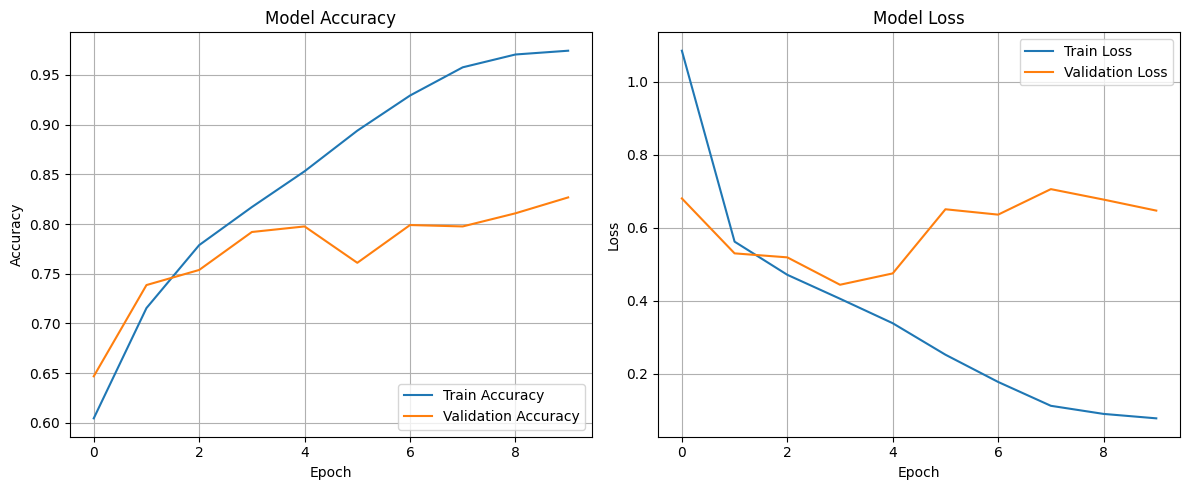

In [57]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

In [59]:
import cv2

In [60]:
test_img = cv2.imread('/content/cat.jpg');

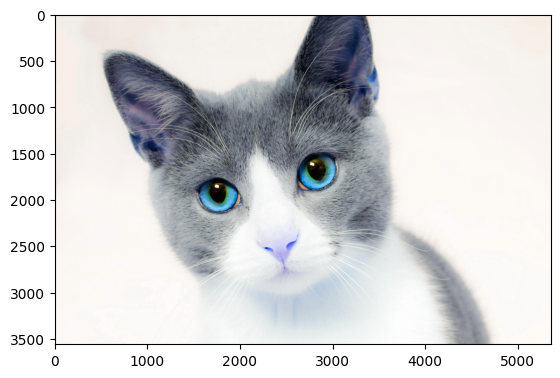

In [61]:
plt.imshow(test_img)

In [62]:
test_img.shape

(3560, 5360, 3)

In [63]:
test_img = cv2.resize(test_img, (256, 256))

In [64]:
test_input = test_img.reshape((1, 256, 256, 3))

In [65]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 943ms/step


array([[0.]], dtype=float32)

In [73]:
!pip install -q gradio

In [74]:
import tensorflow as tf
import numpy as np
import gradio as gr
from PIL import Image

In [75]:
model.save("cats_and_dogs_model.h5")

In [76]:
model = tf.keras.models.load_model("cats_and_dogs_model.h5")

In [78]:
def predict_image(img):
    img = img.resize((256, 256))  # Resize image to model input
    img_array = np.array(img) / 255.0  # Normalize
    img_array = img_array.reshape(1, 256, 256, 3)  # Add batch dimension

    prediction = model.predict(img_array)

    if prediction.shape[1] == 1:
        # Binary sigmoid output
        prob = prediction[0][0]
        label = "Dog" if prob > 0.5 else "Cat"
        confidence = prob if prob > 0.5 else 1 - prob
    else:
        # Softmax output
        class_names = ["Cat", "Dog"]  # Adjust only if reversed in training
        class_idx = np.argmax(prediction)
        label = class_names[class_idx]
        confidence = prediction[0][class_idx]

    return f"{label} ({confidence:.2%} confident)"

In [79]:
interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="Cats vs Dogs Classifier",
    description="Upload an image of a cat or dog and let the model predict."
)

In [80]:
interface.launch(debug=True)

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://51a5d7c3dcfac78c70.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://51a5d7c3dcfac78c70.gradio.live


In [83]:
with open("requirements.txt", "w") as f:
    f.write("tensorflow\ngradio\nnumpy\nPillow\n")

In [84]:
app_code = """
import tensorflow as tf
import numpy as np
import gradio as gr
from PIL import Image

model = tf.keras.models.load_model("cats_and_dogs_model.h5")

def predict_image(img):
    img = img.resize((256, 256))
    img_array = np.array(img) / 255.0
    img_array = img_array.reshape(1, 256, 256, 3)
    prediction = model.predict(img_array)

    if prediction.shape[1] == 1:
        prob = prediction[0][0]
        label = "Dog" if prob > 0.5 else "Cat"
        confidence = prob if prob > 0.5 else 1 - prob
    else:
        class_names = ["Cat", "Dog"]
        class_idx = np.argmax(prediction)
        label = class_names[class_idx]
        confidence = prediction[0][class_idx]

    return f"{label} ({confidence:.2%} confident)"

interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="Cats vs Dogs Classifier",
    description="Upload a cat or dog image and get a prediction!"
)

interface.launch()
"""

with open("app.py", "w") as f:
    f.write(app_code)


In [94]:
readme_content = """
# 🐱🐶 Cats vs Dogs Classifier

This is a simple machine learning web app that classifies images of cats and dogs using a CNN model in TensorFlow and a Gradio GUI.

## Model
The model is trained with 86% accuracy on a cat and dog image dataset.

## How to Run

1. Install dependencies: pip install -r requirements.txt
2. Run the app: python app.py

## Requirements

- TensorFlow
- Gradio
- NumPy
- Pillow

## Author

Made in Google Colab by Mohit Kumar Kashyap
"""

# Save to file
with open("README.md", "w") as file:
    file.write(readme_content)

print("README.md file created successfully!")


README.md file created successfully!


In [95]:
!zip -r cats-vs-dogs-classifier.zip app.py cats_and_dogs_model.h5 requirements.txt README.md


  adding: app.py (deflated 51%)
  adding: cats_and_dogs_model.h5 (deflated 7%)
  adding: requirements.txt (stored 0%)
  adding: README.md (deflated 34%)


In [96]:
from google.colab import files
files.download("cats-vs-dogs-classifier.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>